In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
import pickle

In [2]:
email_data=pd.read_csv('mail_data.csv')
email_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df=pd.DataFrame(email_data)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
class preprocessing:
    """
    Author: Non linear Gang
    This is class for preprocess the data
    """
    def __init__(self,df):
        self.df=df
    def cleaning(self,df):
        """
        This function is used to preprocess the data like check for null and duplicate values
        Parameter: 
          checknull-Used to check wheter null value is there in the dataset or not
          describe-It will describe our dataset
        Return:
          Checknull, describe
        """
        information=df.info()
        checknull=df.isnull().sum()
        df.drop_duplicates(inplace=True)
        describe=df.describe()
        return information,checknull,describe
    
    
class EDA:
    """
Author:Non linear Gang   
This is class is for Exploratory data analysis
    """

    def __init__(self,df):
        self.df=df
        self.count=df['Category'].value_counts()
    def box_plots(self,df):
        """
        This function is for plotting the boxplot showing number of spam and ham message in dataset
        parameter:
            box_plot=It will plot the boxplot of spam and ham messages 
        """
        plt.figure(figsize=(10,7))
        box_plot=sns.histplot(df['Category'],color='g',shrink=0.8)
        
    def pie_plots(self,df):
        """
        This function is for plotting the pieplot showing number of spam and ham message in dataset
        parameter:
            pie_plot=It will plot the pieplot of spam and ham messages 
        """
        plt.figure(figsize=(10,7))
        pie_plot=plt.pie(self.count, labels=['ham','spam'],autopct="%0.2f")
        
    def hist_plots(self,df):
        """
        This function is for plotting the histplot showing number of spam and ham message in dataset
        parameter:
            pie_plot=It will plot the histplot of spam and ham messages 
        """
        df['num_characters']=df['Message'].apply(len)
        plt.figure(figsize=(10,7))
        sns.histplot(df[df['Category'] == 'ham']['num_characters'])
        sns.histplot(df[df['Category'] == 'spam']['num_characters'],color='red')
        
        
class label_encoding:
    """
Author:Non linear Gang   
This class is used for label encoding
    """
    def __init__(self,df):
        self.df=df
    def label_encode(self,df):
        """
        This function is used to encode the spam and ham as 1 and 0
        parameter:
           label_encoder-This is used to call label encode method
           df['Category']-This is assigning the encoded value to category column of a dataframe
        Return:
           df[Category'].unique()
        """
        label_encoder=LabelEncoder()
        df['Category']=label_encoder.fit_transform(df['Category'])
        return df['Category'].unique()
    
    
class Word_Cloud:
    """
    Author: Non linear Gang
    This class is for plotting the word cloud
    """
    def __init__(self,df):
        self.df=df
        self.wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
    def spam_wcs(self,df):
        """
        This function is used to plot the spam word cloud
        Parameters:
           spam_wc-This is used to plot the word cloud of Spam messages
        """
        spam_wc = self.wc.generate(df[df['Category'] == 1]['Message'].str.cat(sep=" "))
        plt.figure(figsize=(15,15))
        plt.imshow(spam_wc)
        
    def ham_wcs(self,df):
        """
        This function is used to plot the ham word cloud
        Parameters:
           ham_wc-This is used to plot the word cloud of ham messages
        """
        ham_wc = self.wc.generate(df[df['Category'] == 0]['Message'].str.cat(sep=" "))
        plt.figure(figsize=(15,15))
        plt.imshow(ham_wc)
        
        
class feature_extractions:
    """
Author:Non linear Gang
This class is used to convert the messages into numerical data
    """
    def __init__(self,df):
        self.df=df
    def feature_extraction_func(self,df):
        """
        This function is used convert the Message column of dataset into array of numbers
        Parameters:
            X_featured-This contains the numerical data of Messages
            feature_extraction-This is used to call Tf-idf vectorizer methode
        Return:
            X_feature, feature_extraction
        """
        feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')
        X_features = feature_extraction.fit_transform(X)
        X_features = feature_extraction.transform(X)
        return X_features,feature_extraction
    
    
class SMOTE:
    """
Author: Non linear Gang
This class is used to solve the class imblance problem of data 
    """
    def __init__(self,df):
        self.df=df
    def SMOTE_func(self,df):
        """
        This function is used to balance  the number of both spam and ham messages
        Parameter: 
          counter- Used for value count of Y
          X_resampled-Resampled data of X
          Y_resampled-Resampled data of Y
        """
        from imblearn.over_sampling import SMOTE
        counter=Y.value_counts()
        print('before SMOTE', counter)
        feature_ext_obj=feature_extractions(df)
        X_feature,feature_extraction=feature_ext_obj.feature_extraction_func(df)
        X_resampled, Y_resampled = SMOTE().fit_resample(X_feature,Y)
        counter= Y_resampled.value_counts()
        print('after SMOTE', counter)
        return X_resampled, Y_resampled
        
        
class pipeline:
    """
    Author: Non linear Gang
    This class is used to pipline for different classifers together and search the best estimators
    """
    def __init__(self,df):
        self.df=df
    def pipeline_fun(self,df):
        """
        In this function we have used a pipline concept for different classifers with different hyper parameters and 
        using random search and cross validation we have predicted the best estimators for prediction
        Parameter: 
             model_list-list of all classifiers used for prediction
             pipelines-pipeline of different classifiers
             params- Hyper parameter dictionary for difeerent classifier
             best_estimaters-list which contain the best estimator
             scoring-list of precision_score,recall_score and accuracy
             cross_val_score-cross valiated score of each classifers
            Return:
               best_estimaters
        """
        pipelines = []
        model_list = [LogisticRegression(max_iter=500),DecisionTreeClassifier(),RandomForestClassifier(),SVC(C=100),KNeighborsClassifier(n_neighbors=7)]
        for model in model_list:
            pipeline = make_pipeline(model,verbose=True)
            pipelines.append(pipeline)
            
        params=[{'logisticregression__solver':['lbfgs','saga','sag'],'logisticregression__penalty':['l2'],'logisticregression__class_weight':[None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]},
        {'decisiontreeclassifier__max_depth':range(5,30,5),'decisiontreeclassifier__min_samples_split':[1,2]},
        {'randomforestclassifier__n_estimators':[10, 50, 100, 250],'randomforestclassifier__max_depth':[5, 10, 20]},
        {'svc__C':[10**-2, 10**-1, 10**0, 10**1, 10**2],'svc__class_weight':[None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]},
        {'kneighborsclassifier__n_neighbors':[2,5,10,25,50]}]
        
        best_estimaters = []
        scoring = ['precision_macro','recall_macro','accuracy']
        cross_val_score = []
        for model,param in zip(pipelines,params):
            random_search = RandomizedSearchCV(model,param,cv=2,n_jobs=-1)
            random_search.fit(X_resampled,Y_resampled)
            model = random_search.best_estimator_
            best_estimaters.append(model)
            y_pred = random_search.predict(X_resampled)
            cross_val_score.append(cross_validate(model,X_resampled,Y_resampled,scoring=scoring,cv=5))
        return best_estimaters 
    
    
class model_prediction:
    """
    Author:Non linear Gang
    This class is used for predict the best model for final prediction
    """
    def __init__(self,df):
        self.df=df
    def best_model(self,df):
        """
        This function is used to predict the best estimator from from the pipeline
        Parameter:
            confusion_matrix- confusion matrics for predicted y and predicted model
            disp- to display the confusion matrics
        Return- Best_estimaters
        """
        pipeline_obj=pipeline(df)
        best_estimaters=pipeline_obj.pipeline_fun(df)
        for i in range(0,5):
            best_estimaters[i].fit(X_train,Y_train)
            pred_check = best_estimaters[i].predict(X_test)
            confusion_mat=confusion_matrix(Y_test,pred_check)
            disp=ConfusionMatrixDisplay(confusion_mat)
            print(best_estimaters[i])
            disp.plot()
            plt.xlabel('Predictions', fontsize=18)
            plt.ylabel('Actuals', fontsize=18)
            plt.title('Confusion Matrix', fontsize=18)
            plt.show()
            print(classification_report(Y_test,pred_check))
        return best_estimaters  

In [5]:
processing_obj=preprocessing(df)
processing_obj.cleaning(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


(None,
 Category    0
 Message     0
 dtype: int64,
        Category                                            Message
 count      5157                                               5157
 unique        2                                               5157
 top         ham  Go until jurong point, crazy.. Available only ...
 freq       4516                                                  1)

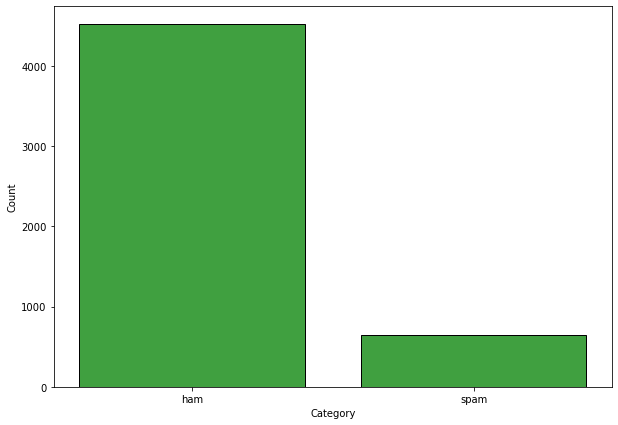

In [6]:
EDA_obj=EDA(df)
EDA_obj.box_plots(df)

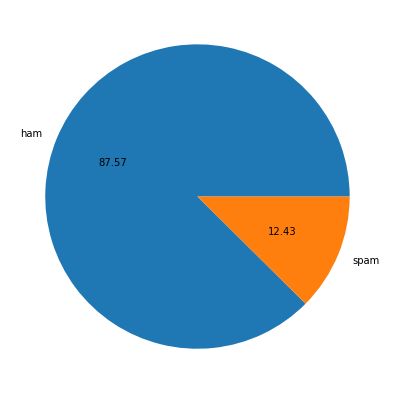

In [7]:
EDA_obj.pie_plots(df)

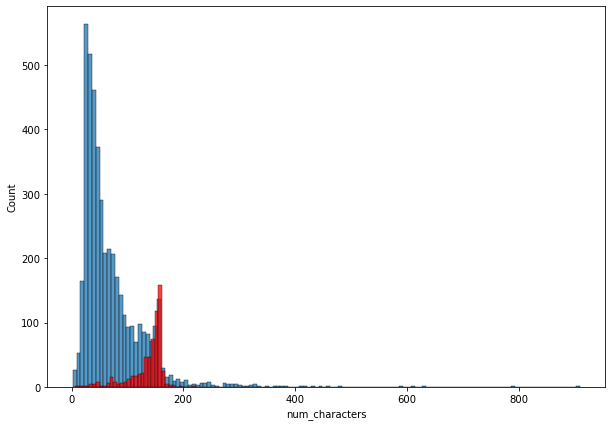

In [8]:
EDA_obj.hist_plots(df)

In [9]:
Label_encode_obj=label_encoding(df)
Label_encode_obj.label_encode(df)

array([0, 1])

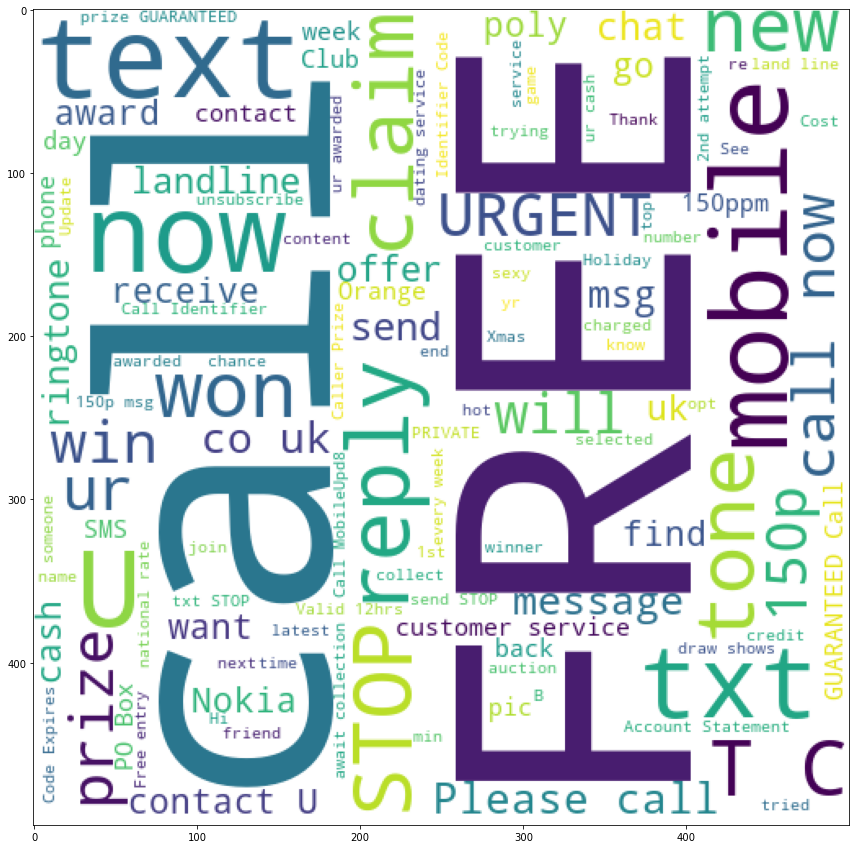

In [10]:
WC_obj=Word_Cloud(df)
WC_obj.spam_wcs(df)

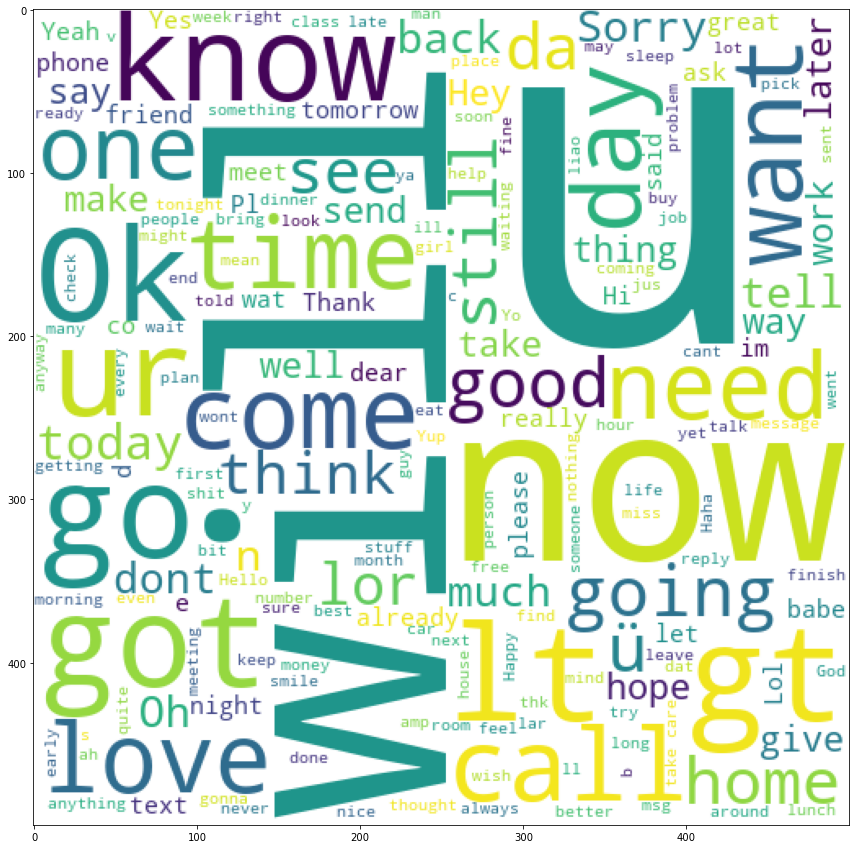

In [11]:
WC_obj.ham_wcs(df)

In [12]:
# saperating X and Y
X = df['Message']
Y= df['Category']


In [13]:
feature_ext_obj=feature_extractions(df)
X_feature,feature_extraction=feature_ext_obj.feature_extraction_func(df)
print(feature_extraction)

TfidfVectorizer(lowercase='True', stop_words='english')


In [14]:
SMOTE_obj=SMOTE(df)
X_resampled,Y_resampled=SMOTE_obj.SMOTE_func(df)

before SMOTE 0    4516
1     641
Name: Category, dtype: int64
after SMOTE 0    4516
1    4516
Name: Category, dtype: int64


In [15]:
X_train, X_test, Y_train, Y_test=train_test_split(X_resampled,Y_resampled, test_size=0.20)

In [16]:
# pipeline_obj=pipeline(df)
# pipeline_obj.pipeline_fun(df)

[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.3s
[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.3s
[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.1s
[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.1s
[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.2s
[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.1s


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Admin\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Admin\anaconda3\lib\site-packa

[Pipeline]  (step 1 of 1) Processing decisiontreeclassifier, total=   0.6s
[Pipeline]  (step 1 of 1) Processing decisiontreeclassifier, total=   0.5s
[Pipeline]  (step 1 of 1) Processing decisiontreeclassifier, total=   0.4s
[Pipeline]  (step 1 of 1) Processing decisiontreeclassifier, total=   0.4s
[Pipeline]  (step 1 of 1) Processing decisiontreeclassifier, total=   0.4s
[Pipeline]  (step 1 of 1) Processing decisiontreeclassifier, total=   0.4s
[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   2.5s
[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   6.7s
[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   6.8s
[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   6.8s
[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   7.6s
[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   7.7s
[Pipeline] ............... (step 1 of 1) Processing svc, total=   7.3s
[Pipeline] ............... (s

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[Pipeline]  (step 1 of 1) Processing kneighborsclassifier, total=   0.0s
[Pipeline]  (step 1 of 1) Processing kneighborsclassifier, total=   0.0s
[Pipeline]  (step 1 of 1) Processing kneighborsclassifier, total=   0.0s
[Pipeline]  (step 1 of 1) Processing kneighborsclassifier, total=   0.0s
[Pipeline]  (step 1 of 1) Processing kneighborsclassifier, total=   0.0s
[Pipeline]  (step 1 of 1) Processing kneighborsclassifier, total=   0.0s
[Pipeline]  (step 1 of 1) Processing logisticregression, total=   0.2s
Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=500))],
         verbose=True)


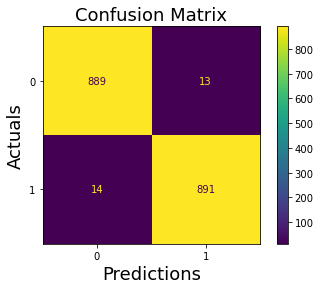

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       902
           1       0.99      0.98      0.99       905

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807

[Pipeline]  (step 1 of 1) Processing decisiontreeclassifier, total=   0.5s
Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=25))],
         verbose=True)


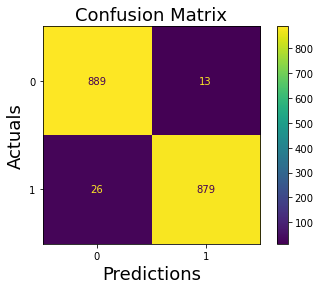

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       902
           1       0.99      0.97      0.98       905

    accuracy                           0.98      1807
   macro avg       0.98      0.98      0.98      1807
weighted avg       0.98      0.98      0.98      1807

[Pipeline]  (step 1 of 1) Processing randomforestclassifier, total=   8.2s
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_estimators=250))],
         verbose=True)


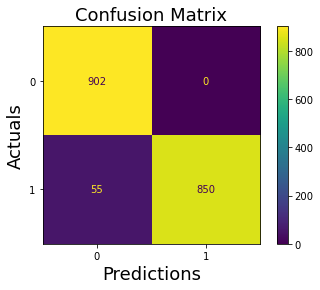

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       902
           1       1.00      0.94      0.97       905

    accuracy                           0.97      1807
   macro avg       0.97      0.97      0.97      1807
weighted avg       0.97      0.97      0.97      1807

[Pipeline] ............... (step 1 of 1) Processing svc, total=   4.9s
Pipeline(steps=[('svc', SVC(C=10, class_weight={0: 1, 1: 25}))], verbose=True)


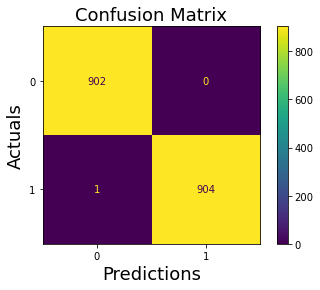

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       905

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807

[Pipeline]  (step 1 of 1) Processing kneighborsclassifier, total=   0.0s
Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))],
         verbose=True)


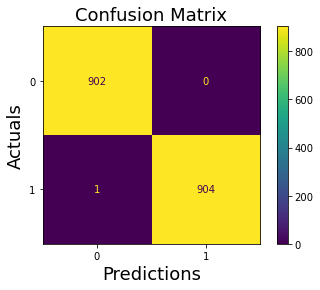

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       905

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807



In [17]:
model_prediction_obj=model_prediction(df)
best_estimators=model_prediction_obj.best_model(df)

In [24]:
best_model=best_estimators[3]
pickle.dump(best_model, open('class_spam.pkl','wb'))
pickle.dump(feature_extraction, open('class_vectorizer.pkl','wb'))
model1 =pickle.load(open('class_spam.pkl','rb'))
vectorizer=pickle.load(open('class_vectorizer.pkl','rb'))